In [2]:
import pandas as pd
import numpy as np

# create a header for the 376 frequency spectrum based features and the class label Y(f1, f2, ...., f376, Y)
# Y = 1, 2, 3, 4, 8, and 12 for malicious while Y = 0 for benign
header = []
for i in range(1,377):
    header.append('f'+str(i))
header.append('Y')

# the data set for the 7 classes (6 malicious + 1 benign)
# each csv file contains 15 examples of one class of 376 features each (15 X 376 table)
# the original data are a set of 105 time series of 1.5 million samples each (105 X 1500000)
# we use a third party matlab library to evaluate the 376 features (Fourier spectrum based features)
# Hence, the input to the third party library is 1 X 1500000 time series, the output is 1 X 376 vector
# for more information about the third party package: 
# https://github.com/benfulcher/hctsaDocumentation/blob/master/README.md
# In summary, the data are 7 classes X 15 time series X 1500000 samples
df1 = pd.read_csv('power_consumption_frequency_features_1.csv', names=header)
df2 = pd.read_csv('power_consumption_frequency_features_2_.csv', names=header)
df3 = pd.read_csv('power_consumption_frequency_features_3_.csv', names=header)
df4 = pd.read_csv('power_consumption_frequency_features_4_.csv', names=header)
df8 = pd.read_csv('power_consumption_frequency_features_8_.csv', names=header)
df12 = pd.read_csv('power_consumption_frequency_features_12_.csv', names=header)
df_b = pd.read_csv('power_consumption_frequency_features_benign.csv', names=header)
df1.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f368,f369,f370,f371,f372,f373,f374,f375,f376,Y
0,4747.883870,0.000003,0.000006,133,55,46,39,8,1926.060966,88.210292,...,0.025885,0.998365,2,20,4,2.441772,64.592722,20.253090,8.294424,1
1,4884.918041,0.000003,0.000006,130,55,44,37,7,2082.862252,119.588487,...,0.026605,0.997859,2,22,6,2.294072,66.046096,19.029453,8.295054,1
2,5250.737817,0.000003,0.000006,133,55,47,39,8,2328.801129,102.940627,...,0.026675,0.997964,6,30,2,2.407694,64.847499,20.003460,8.308142,1
3,3643.670388,0.000003,0.000006,132,55,48,37,11,1421.427140,74.834776,...,0.029392,0.997456,2,30,2,2.396938,68.597620,17.738204,7.400360,1
4,4348.715227,0.000003,0.000006,128,55,44,40,9,1862.800597,121.039932,...,0.029208,0.997341,4,30,6,2.287414,64.821011,19.721553,8.621768,1


In [4]:
df1.dtypes

f1      float64
f2      float64
f3      float64
f4        int64
f5        int64
f6        int64
f7        int64
f8        int64
f9      float64
f10     float64
f11     float64
f12     float64
f13     float64
f14     float64
f15     float64
f16     float64
f17     float64
f18       int64
f19     float64
f20     float64
f21     float64
f22     float64
f23     float64
f24     float64
f25     float64
f26     float64
f27     float64
f28     float64
f29     float64
f30     float64
         ...   
f348    float64
f349    float64
f350    float64
f351    float64
f352    float64
f353    float64
f354    float64
f355    float64
f356    float64
f357    float64
f358    float64
f359    float64
f360    float64
f361    float64
f362    float64
f363    float64
f364    float64
f365    float64
f366    float64
f367    float64
f368    float64
f369    float64
f370      int64
f371      int64
f372      int64
f373    float64
f374    float64
f375    float64
f376    float64
Y         int64
Length: 377, dtype: obje

In [6]:
from sklearn.preprocessing import StandardScaler


# Separating out the features and labels of the 1st malware
x1 = df1.drop('Y', axis=1).values
y1 = df1['Y']

# Separating out the features and labels of the 2nd malware
x2 = df2.drop('Y', axis=1).values
y2 = df2['Y']

# Separating out the features and labels of the 3rd malware
x3 = df3.drop('Y', axis=1).values
y3 = df3['Y']

# Separating out the features and labels of the 4th malware
x4 = df4.drop('Y', axis=1).values
y4 = df4['Y']

# Separating out the features and labels of the 5th malware
x8 = df8.drop('Y', axis=1).values
y8 = df8['Y']

# Separating out the features and labels of the 6th malware
x12 = df12.drop('Y', axis=1).values
y12 = df12['Y']

# Separating out the features and labels of the benign
xb = df_b.drop('Y', axis=1).values
yb = df_b['Y']

# packing vertically the data of all classes
x = np.vstack((x1, x2, x3, x4, x8, x12, xb))

# Standardizing the features
x_stand = StandardScaler().fit_transform(x)


In [7]:
from sklearn.decomposition import PCA

# visualizing the first two principal components
pca = PCA(n_components=2)
projected_x = pca.fit_transform(x_stand)

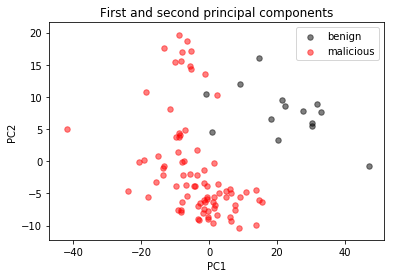

In [9]:
import matplotlib.pyplot as plt

# ploting the first two components
plt.scatter(projected_x[90:104,0], projected_x[90:104,1], s=30, c='k', alpha=0.5, label='benign')
plt.scatter(projected_x[0:14,0], projected_x[0:14,1], s=30, c='r', alpha=0.5, label='malicious')
plt.scatter(projected_x[15:29,0], projected_x[15:29,1], s=30, c='r', alpha=0.5)
plt.scatter(projected_x[30:44,0], projected_x[30:44,1], s=30, c='r', alpha=0.5)
plt.scatter(projected_x[45:59,0], projected_x[45:59,1], s=30, c='r', alpha=0.5)
plt.scatter(projected_x[60:74,0], projected_x[60:74,1], s=30, c='r', alpha=0.5)
plt.scatter(projected_x[75:89,0], projected_x[75:89,1], s=30, c='r', alpha=0.5)

plt.title('First and second principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

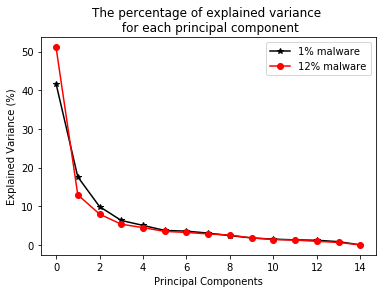

In [12]:
# Explained variance for 1% and 12% malicious behaviors
pca = PCA()

# 1% malware
x1_stand = StandardScaler().fit_transform(x1)
projected_x1 = pca.fit_transform(x1_stand)
plt.plot(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_, 'k*-', label='1% malware')

# 12% malware
x12_stand = StandardScaler().fit_transform(x12)
projected_x12 = pca.fit_transform(x12_stand)
plt.plot(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_, 'ro-', label='12% malware')

plt.title('The percentage of explained variance \n for each principal component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.legend()
plt.show()

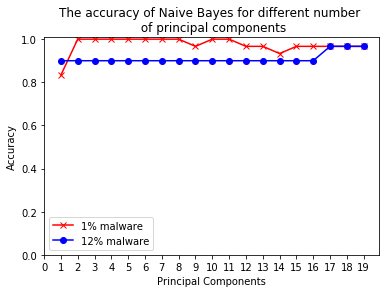

In [13]:
# building the pipeline to evaluate the impact of the number of principal components
# we use Gaussian NB classifier to gauge the results

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV


# this function returns the mean accuracy for each number of PCs
# we use naive bayes accuracy as a metric to score the number of PCs

def pca_vs_score(x_malware, y_malware):
    score_dict = {}
    
# we consider up to 19 PCs
    for n in list(range(1,20)):
        
        # Create an scaler object
        sc = StandardScaler()
        
        # Create a pca object
        pca = PCA(n_components=n)
        
        # Create a naive bayes classifier
        gnb = GaussianNB()
        
        # Create a pipeline of three steps. First, standardize the data.
        # Second, tranform the data with PCA.
        # Third, train a NB classifier on the data.
        pipeline = Pipeline(steps=[('sc', sc), ('pca', pca), ('gnb', gnb)])
        
        # It is a binary classification problem. Create the feature matrix for x1, e.g., and xb classes
        xbm = np.vstack((x_malware, xb))
        ybm = np.hstack((y_malware, yb))
        
        pipeline.fit(xbm, ybm)
        score_dict[n] = cross_val_score(pipeline, xbm, ybm, cv=5).mean()
    return score_dict

# visualize the mean of the classification accuracy
plt.plot(range(1, len(pca_vs_score(x1, y1))+1), pca_vs_score(x1, y1).values(),'rx-', label='1% malware')
plt.plot(range(1, len(pca_vs_score(x12, y12))+1), pca_vs_score(x12, y12).values(),'bo-', label='12% malware')

plt.xticks(range(len(pca_vs_score(x12, y12))+1))
plt.yticks(np.arange(0.0, 1.2, 0.2))

plt.ylabel('Accuracy')
plt.xlabel('Principal Components')

plt.legend()
plt.title('The accuracy of Naive Bayes for different number \n of principal components')
plt.show()

C:\Users\Mustafa\Anaconda3\envs\IntroML\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mustafa\Anaconda3\envs\IntroML\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mustafa\Anaconda3\envs\IntroML\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mustafa\Anaconda3\envs\IntroML\lib\site-

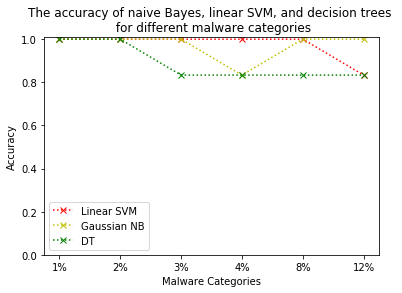

In [16]:
# building the pipeline to evalaute the most optimal classifier

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
import seaborn as sns

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Create an scaler object
sc = StandardScaler()

# Create a pca object
pca = PCA(n_components=4)

def classifier_score(x_malware, y_malware, estimator, param_grid):
    
    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a classifier on the data using estimator.
    pipeline = Pipeline(steps=[('sc', sc), ('pca', pca), ('classifier', estimator)])
    
    # It is a binary classification problem. Create the feature matrix for x1 and xb classes
    xbm = np.vstack((x_malware, xb))
    ybm = np.hstack((y_malware, yb))
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(xbm, ybm, test_size=0.2)
    
    # Create a grid search object
    cv = GridSearchCV(pipeline, param_grid, scoring=acc_scorer, cv=5)
    
    # Fit the grid search
    cv.fit(X_train, y_train)
    
    # Set the clf to the best combination of parameters
    clf = cv.best_estimator_
    
    # Fit the best algorithm to the data. 
    clf.fit(X_train, y_train)
    
    # evaluate the classifier
    preds = clf.predict(X_test)
    return accuracy_score(y_test, preds)

# parameters for linear SVM
if True:
    acc1 = []
    Cs = [0.001, 0.01, 0.1, 1, 10]
    param_grid1 = {'classifier__C': Cs}
    
    # we evaluate 6 binary LSVM classifiers
    acc1.append(classifier_score(x1, y1, LinearSVC(), param_grid1))
    acc1.append(classifier_score(x2, y2, LinearSVC(), param_grid1))
    acc1.append(classifier_score(x3, y3, LinearSVC(), param_grid1))
    acc1.append(classifier_score(x4, y4, LinearSVC(), param_grid1))
    acc1.append(classifier_score(x8, y8, LinearSVC(), param_grid1))
    acc1.append(classifier_score(x12, y12, LinearSVC(), param_grid1))
    
    # plot accuracy
    plt.plot(range(len(acc1)), acc1,'rx:', label='Linear SVM')

# parameters for naive Bayes
if True:
    acc2 = []
    param_grid2 = {}
    
    # we evaluate 6 binary NB classifiers
    acc2.append(classifier_score(x1, y1, GaussianNB(), param_grid2))
    acc2.append(classifier_score(x2, y2, GaussianNB(), param_grid2))
    acc2.append(classifier_score(x3, y3, GaussianNB(), param_grid2))
    acc2.append(classifier_score(x4, y4, GaussianNB(), param_grid2))
    acc2.append(classifier_score(x8, y8, GaussianNB(), param_grid2))
    acc2.append(classifier_score(x12, y12, GaussianNB(), param_grid2))
    
    # plot accuracy
    plt.plot(range(len(acc2)), acc2,'yx:', label='Gaussian NB')

# parameters for decision tree
if True:
    acc3 = []
    param_grid3 = {'classifier__max_features': ['log2', 'sqrt','auto'], 'classifier__criterion': ['entropy', 'gini'],
                  'classifier__max_depth': [2, 3, 5, 10], 'classifier__min_samples_split': [2, 3, 5], 'classifier__min_samples_leaf': [1,5,8]}
    
    # we evaluate 6 binary DT classifiers
    acc3.append(classifier_score(x1, y1, DecisionTreeClassifier(), param_grid3))
    acc3.append(classifier_score(x2, y2, DecisionTreeClassifier(), param_grid3))
    acc3.append(classifier_score(x3, y3, DecisionTreeClassifier(), param_grid3))
    acc3.append(classifier_score(x4, y4, DecisionTreeClassifier(), param_grid3))
    acc3.append(classifier_score(x8, y8, DecisionTreeClassifier(), param_grid3))
    acc3.append(classifier_score(x12, y12, DecisionTreeClassifier(), param_grid3))
    
    # plot accuracy
    plt.plot(range(len(acc3)), acc3,'gx:', label='DT')

x_label = ['1%', '2%', '3%', '4%', '8%', '12%']
plt.xticks(range(len(x_label)), x_label)
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.ylabel('Accuracy')
plt.xlabel('Malware Categories')
plt.legend()
plt.title('The accuracy of naive Bayes, linear SVM, and decision trees \n for different malware categories')
plt.show()